### update: 221017

In [1]:
import os, sys, copy
import time
sys.path.append('../')


from IPython.display import HTML
from IPython import display

import numpy as np
import random
import matplotlib.pyplot as plt

from datetime import datetime
import pandas as pd
import seaborn as sns


import librosa
import librosa.display

import cv2
import skimage.io


# seed 값 생성
random.seed(3)
np.random.seed(3)

import myokit
import pints
import myokit.pacing as pacing

import os, sys

# sys.path.append('./')
from getdata import get_times, get_dataset

In [2]:
cell_to_remove = []#[ 'A04', 'A15', 'E05', 'E22', 'G10', 'G22', 'H08', 'I10', 'I12', 'I16', 'L08', 'P15', 'P18' ] # M24
param_names = ['g', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8' ]

In [3]:
start_time = time.time()

times = get_times()
currents, params, cells = get_dataset( cell_to_remove=cell_to_remove, scale=1, multi=True, torch_tensor=False)

print("--- %s seconds ---"%(time.time()-start_time))
print(currents.shape, params.shape)

The number of full cells : 211
The number of removed Cells : 0
The number of cells : 211
--- 6.437638521194458 seconds ---
(211, 77000) (211, 9)


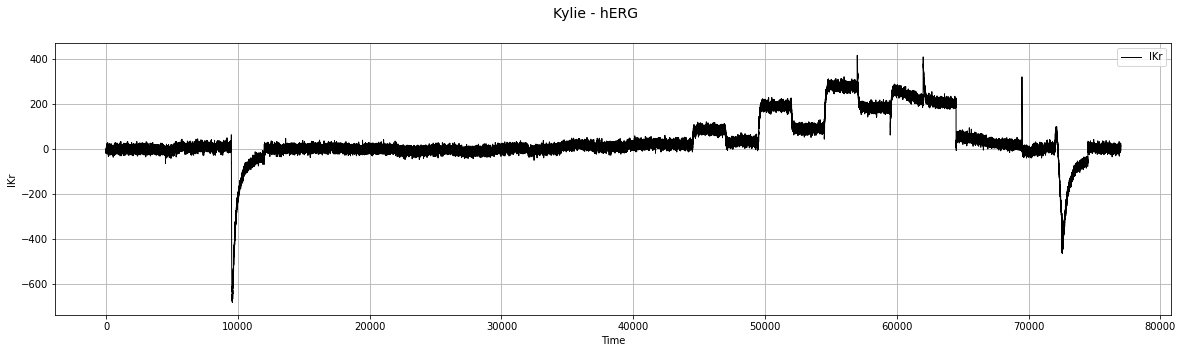

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice.
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [4]:
std_li = []
for i, IKr in enumerate(currents[:1]):    
    
    # print("std of IKr %d :"%(i), std)
    fig, ax = plt.subplots(figsize=(20,5))    
    fig.suptitle("Kylie - hERG", fontsize=14)
    # ax.set_title('Simulation %d'%(simulationNo))
#     ax.set_xlim(xlim[0], xlim[1])
#     ax.set_ylim(ylim[0], ylim[1])
    ax.set_xlabel("Time")
    plt.ylabel("IKr")     
    ax.plot(IKr, c='k', label='IKr', linewidth=1)   
    # textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(GNa/g_fc[0], GNaL/g_fc[1], Gto/g_fc[2], PCa/g_fc[3], GKr/g_fc[4], GKs/g_fc[5], GK1/g_fc[6], Gf/g_fc[7])
    # props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    #     ax.text(0.67, 0.60, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)    
    #     fig1 = plt.gcf()
    ax.grid(True)  
    ax.legend()
    plt.show()
    # if save_path != None:
    #     fig.savefig(save_path, dpi=100)
avg_std = np.array(std_li).mean()

In [5]:
for i, param in enumerate(param_names):
    p_max = params[:, i].max()
    p_min = params[:, i].min()
    print( "%s - Min : %f  |  Max : %f"%(param, p_min, p_max))

g - Min : 3057.629860  |  Max : 499846.287355
p1 - Min : 0.000105  |  Max : 2.540218
p2 - Min : 34.818086  |  Max : 354.333484
p3 - Min : 0.000381  |  Max : 0.514347
p4 - Min : 14.216768  |  Max : 85.716073
p5 - Min : 0.734276  |  Max : 465.046684
p6 - Min : 0.000109  |  Max : 167.082857
p7 - Min : 0.703004  |  Max : 82.755181
p8 - Min : 0.000100  |  Max : 88.851450


In [6]:
std_li = []
for i, IKr in enumerate(currents):    
    std_li.append(IKr[:900].std())
avg_std = np.array(std_li).mean()
print("Average std:", avg_std)

Average std: 10.796692801070558


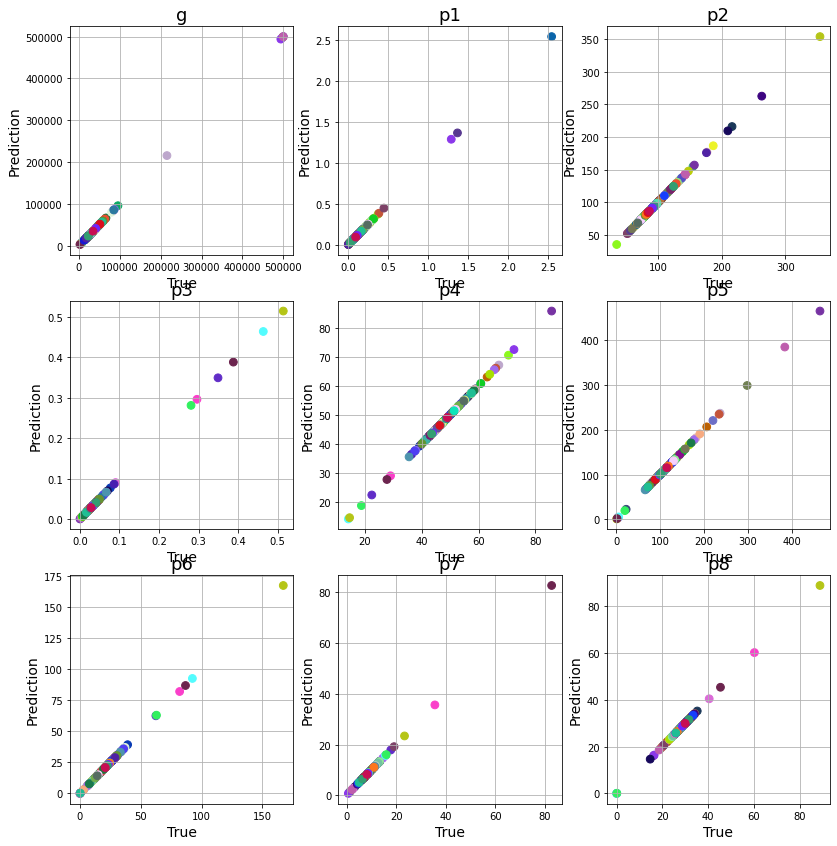

In [7]:
import matplotlib.cm as cm 
fig, ax = plt.subplots(3, 3, figsize=(12, 12))

# colors = cm.rainbow(np.linspace(0, 1, len(cell_li)))
np.random.seed(2)
colors = np.random.rand(params.shape[0], 3)
# Marker size in units of points^2

# close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

for i in range(3):        
    for j in range(3):           
#             ax[i, j].set_xlim(-range_crit, range_crit)
#             ax[i, j].set_ylim(-range_crit, range_crit)  
        index = i*3 + j
        title = param_names[index]
        x = params[:, index]
        y = params[:, index]        
                
        ax[i, j].set_title( "%s"%(title), fontsize=18)           
        # ax[i, j].plot([0, 1], [0, 1], c='r')
        ax[i, j].scatter(x, y, label="", c=colors, s=60)            
        ax[i, j].set_xlabel( 'True', fontsize=14)
        ax[i, j].set_ylabel( "Prediction", fontsize=14)        
#         ax[i, j].legend()
        ax[i, j].grid(True)  
            
        # textstr = "MSE : %f"%(mse)
        # props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)        
        # ax[i, j].text(0.1, 0.95, textstr, transform=ax[i, j].transAxes, fontsize=18, verticalalignment='top', bbox=props)    
# plt.colorbar(label='color')
# fig.suptitle("Parameter estimation")
# fig1 = plt.gcf()
# plt.tight_layout()
plt.subplots_adjust(left=0.07, bottom=0.05, right=0.95, top=0.95, wspace=0.2, hspace=0.2)
# plt.savefig( os.path.join(output_dir1, 'results1.jpg'), dpi=199) 
plt.show()

In [8]:
over_cells = []
for i in range(len(params)):
    cell = cells[i]
    cond = params[i, 0]
    if cond > 100000:
        over_cells.append(cell)
        print(f"Conductance of {cell}: {cond}")
over_cells

Conductance of G10: 499846.2873554121
Conductance of I10: 497911.1538081688
Conductance of I12: 493883.1422775284
Conductance of A04: 215551.69037627397
Conductance of M24: 499563.1131173876


['G10', 'I10', 'I12', 'A04', 'M24']

In [9]:
start_time = time.time()

cell_to_remove = over_cells
times = get_times()
currents, params, cells = get_dataset( cell_to_remove=cell_to_remove, scale=1, multi=True, torch_tensor=False)

print("--- %s seconds ---"%(time.time()-start_time))
print(currents.shape, params.shape)

The number of full cells : 211
The number of removed Cells : 5
The number of cells : 206
--- 5.827788591384888 seconds ---
(206, 77000) (206, 9)


In [10]:
for i, param in enumerate(param_names):
    p_max = params[:, i].max()
    p_min = params[:, i].min()
    print( "%s - Min : %f  |  Max : %f"%(param, p_min, p_max))

g - Min : 3057.629860  |  Max : 95776.556064
p1 - Min : 0.000105  |  Max : 2.540218
p2 - Min : 34.818086  |  Max : 354.333484
p3 - Min : 0.003240  |  Max : 0.514347
p4 - Min : 14.216768  |  Max : 70.536942
p5 - Min : 0.734276  |  Max : 234.597633
p6 - Min : 0.223212  |  Max : 167.082857
p7 - Min : 2.684010  |  Max : 82.755181
p8 - Min : 0.000100  |  Max : 88.851450


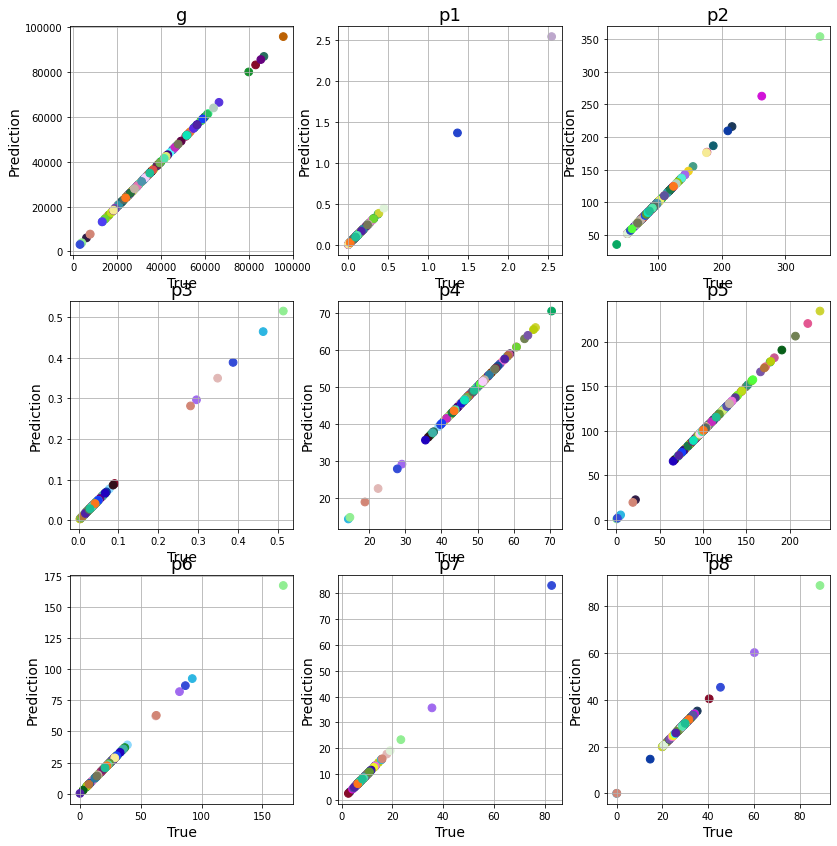

In [11]:
import matplotlib.cm as cm 
fig, ax = plt.subplots(3, 3, figsize=(12, 12))

# colors = cm.rainbow(np.linspace(0, 1, len(cell_li)))
np.random.seed(2)
colors = np.random.rand(params.shape[0], 3)
# Marker size in units of points^2

# close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

for i in range(3):        
    for j in range(3):           
#             ax[i, j].set_xlim(-range_crit, range_crit)
#             ax[i, j].set_ylim(-range_crit, range_crit)  
        index = i*3 + j
        title = param_names[index]
        x = params[:, index]
        y = params[:, index]        
                
        ax[i, j].set_title( "%s"%(title), fontsize=18)           
        # ax[i, j].plot([0, 1], [0, 1], c='r')
        ax[i, j].scatter(x, y, label="", c=colors, s=60)            
        ax[i, j].set_xlabel( 'True', fontsize=14)
        ax[i, j].set_ylabel( "Prediction", fontsize=14)        
#         ax[i, j].legend()
        ax[i, j].grid(True)  
            
        # textstr = "MSE : %f"%(mse)
        # props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)        
        # ax[i, j].text(0.1, 0.95, textstr, transform=ax[i, j].transAxes, fontsize=18, verticalalignment='top', bbox=props)    
# plt.colorbar(label='color')
# fig.suptitle("Parameter estimation")
# fig1 = plt.gcf()
# plt.tight_layout()
plt.subplots_adjust(left=0.07, bottom=0.05, right=0.95, top=0.95, wspace=0.2, hspace=0.2)
# plt.savefig( os.path.join(output_dir1, 'results1.jpg'), dpi=199) 
plt.show()